Mount Drive


In [2]:
  from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch

Kaggle -> Google Drive -> Colab

In [4]:
!git clone https://github.com/scaleapi/pandaset-devkit.git
!pip install pandaset-devkit/python/

Cloning into 'pandaset-devkit'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 191 (delta 47), reused 22 (delta 7), pack-reused 96
Receiving objects: 100% (191/191), 21.05 MiB | 33.01 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Processing ./pandaset-devkit/python
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 151 kB 7.3 MB/s 
     |████████████████████████████████| 156 kB 35.7 MB/s 
     |████████████████████████████████| 115 kB 43.5 MB/s 
     |████████████████████████████████| 58 kB 6.1 MB/s 


In [5]:
from pandaset import DataSet

dataset = DataSet('/content/drive/My Drive/Truckin/')

print(dataset)

print("The sequences that have (cuboid + semantic) segmentation annotations:\n", dataset.sequences(with_semseg=True))

for i in dataset.sequences(with_semseg=False):
    print(i)

The sequences that have (cuboid + semantic) segmentation annotations:
 ['005', '002', '003', '001']
005
006
002
004
003
008
001


Move Data from drive to dataset object

In [6]:
seq002 = dataset['002']

#load into memory
seq002.load()

print(seq002.__dict__)

{'_directory': '/content/drive/My Drive/Truckin/002', '_lidar': <pandaset.sensors.Lidar object at 0x7fbefd1a4dd0>, '_camera': {'back_camera': <pandaset.sensors.Camera object at 0x7fbefd1a4a50>, 'front_left_camera': <pandaset.sensors.Camera object at 0x7fbefd1a4850>, 'right_camera': <pandaset.sensors.Camera object at 0x7fbefd1a4ad0>, 'front_right_camera': <pandaset.sensors.Camera object at 0x7fbefd1a4e90>, 'left_camera': <pandaset.sensors.Camera object at 0x7fbefd1a4c50>, 'front_camera': <pandaset.sensors.Camera object at 0x7fbefd1a47d0>}, '_gps': <pandaset.meta.GPS object at 0x7fbefd1a4450>, '_timestamps': <pandaset.meta.Timestamps object at 0x7fbefd1a4f50>, '_cuboids': <pandaset.annotations.Cuboids object at 0x7fbefd1a4e50>, '_semseg': <pandaset.annotations.SemanticSegmentation object at 0x7fbefd1a4f10>}


Now that we have seen how the seq and data set look like we need to access the lidar data

In [7]:
lidarObj = seq002.lidar

print(lidarObj)

print(f"Time stamps from lidar object: {lidarObj.timestamps}")

#print(f"Panda set object: {pandaset.sensors.Lidar}")

print(f"Lidar data obj {lidarObj.data}")



Time stamps from lidar object: [1557539956.500022, 1557539956.600033, 1557539956.700054, 1557539956.800082, 1557539956.900127, 1557539957.000168, 1557539957.100209, 1557539957.200244, 1557539957.300288, 1557539957.400344, 1557539957.500393, 1557539957.600448, 1557539957.700504, 1557539957.800548, 1557539957.900604, 1557539958.000649, 1557539958.100672, 1557539958.200685, 1557539958.300697, 1557539958.400715, 1557539958.500722, 1557539958.600723, 1557539958.700717, 1557539958.800696, 1557539958.900671, 1557539959.000633, 1557539959.100594, 1557539959.200557, 1557539959.300518, 1557539959.400481, 1557539959.500444, 1557539959.600418, 1557539959.700396, 1557539959.80037, 1557539959.90033, 1557539960.000303, 1557539960.100261, 1557539960.200213, 1557539960.300195, 1557539960.400179, 1557539960.500117, 1557539960.600069, 1557539960.700019, 1557539960.799947, 1557539960.899877, 1557539960.999823, 1557539961.099797, 1557539961.199792, 1557539961.299801, 1557539961.399802, 1557539961.499812, 1

Lidar to Pytorch Var

In [8]:
import plotly.graph_objects as go 
  
headerColor = 'rgb(116,0,4)'

annon_class = []
for key in seq002.semseg.classes:
    annon_class.append(seq002.semseg.classes[key])
  
fig = go.Figure(data=[go.Table( 
    header = dict(values=['<b>Semantic Segmentation Annotations for Sequence 002 (Possible Labels)</b>'],
                  line_color='darkslategray',
                  fill_color=headerColor,
                  align=['left','center'],
                  font=dict(color='white', size=12)
                 ), 
    cells = dict(values=[annon_class],
                 line_color='darkslategray',
                 align = ['left', 'center'],
                 font = dict(color = headerColor, size = 11)
                )) 
                     ]) 
fig.show() 

In [9]:
lidar_poses = seq002.lidar._poses
print(lidar_poses[0])

{'position': {'x': 0.0, 'y': 0.0, 'z': 0.0}, 'heading': {'w': 0.9227878803693977, 'x': 0.004463029824737836, 'y': 0.017858463809403605, 'z': -0.3848683989086472}}


In [10]:
import csv
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandaset

import os
   
pfile = "/content/drive/My Drive/Truckin/001/lidar/01.pkl"
with open(pfile, "rb") as fin:
    data = pickle.load(fin)

data.info()

dataset = pandaset.DataSet("/content/drive/My Drive/Truckin/")
seq002 = dataset["002"]
seq002.load_lidar().load_semseg()

points3d_lidar_xyz = seq002.lidar.data

print(seq002.semseg.classes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168814 entries, 0 to 168813
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       168814 non-null  float64
 1   y       168814 non-null  float64
 2   z       168814 non-null  float64
 3   i       168814 non-null  float64
 4   t       168814 non-null  float64
 5   d       168814 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 7.7 MB
{'1': 'Smoke', '2': 'Exhaust', '3': 'Spray or rain', '4': 'Reflection', '5': 'Vegetation', '6': 'Ground', '7': 'Road', '8': 'Lane Line Marking', '9': 'Stop Line Marking', '10': 'Other Road Marking', '11': 'Sidewalk', '12': 'Driveway', '13': 'Car', '14': 'Pickup Truck', '15': 'Medium-sized Truck', '16': 'Semi-truck', '17': 'Towed Object', '18': 'Motorcycle', '19': 'Other Vehicle - Construction Vehicle', '20': 'Other Vehicle - Uncommon', '21': 'Other Vehicle - Pedicab', '22': 'Emergency Vehicle', '23': 'Bus', '24': 'Personal Mobilit

3d plots of lidar

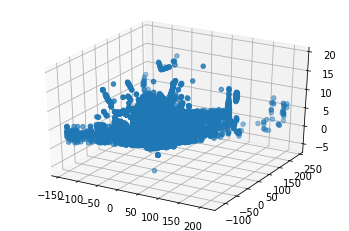

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random

ax = plt.axes(projection='3d')

xyz = data[['x', 'y', 'z']].to_numpy()
color_maps = [(random.random(), random.random(), random.random()) for _ in range(1000 + 1)]
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2])

Lidar Data to pytorch var

In [12]:
!pip install torch
!echo torch version 

torch version


In [13]:
import torch
import numpy as np


xyz = data[['x', 'y', 'z']].to_numpy()
print(xyz)
print(xyz.shape)


xyz_torch = torch.from_numpy(xyz)
print(xyz_torch)
print(type(xyz_torch))
print(xyz_torch.size())



[[-5.54381829e+01 -5.81886604e+01  1.24330060e+00]
 [-4.25697452e+01 -4.46400876e+01  2.80387558e-01]
 [-2.00098557e+01 -2.09976632e+01  5.54927637e-02]
 ...
 [ 3.11367270e+01  2.02043368e+01  4.50633206e+00]
 [ 3.16166094e+01  2.04239118e+01  4.55090970e+00]
 [ 3.12120022e+01  2.01030638e+01  4.50818503e+00]]
(168814, 3)
tensor([[-5.5438e+01, -5.8189e+01,  1.2433e+00],
        [-4.2570e+01, -4.4640e+01,  2.8039e-01],
        [-2.0010e+01, -2.0998e+01,  5.5493e-02],
        ...,
        [ 3.1137e+01,  2.0204e+01,  4.5063e+00],
        [ 3.1617e+01,  2.0424e+01,  4.5509e+00],
        [ 3.1212e+01,  2.0103e+01,  4.5082e+00]], dtype=torch.float64)
<class 'torch.Tensor'>
torch.Size([168814, 3])


Goal: Train model one frame at a time

In [14]:
import torch
import numpy as np


lidarList = ['/00.pkl', '/01.pkl','/02.pkl','/03.pkl','/04.pkl','/05.pkl','/06.pkl','/07.pkl', 
             '/08.pkl','/09.pkl','/10.pkl','/11.pkl', '/11.pkl','/12.pkl','/13.pkl','/14.pkl',
             '/15.pkl','/16.pkl','/17.pkl','/18.pkl','/19.pkl','/20.pkl','/21.pkl','/22.pkl',
             '/23.pkl','/24.pkl', '/25.pkl','/26.pkl','/27.pkl','/28.pkl','/29.pkl', 
             '/30.pkl', '/31.pkl','/32.pkl','/33.pkl','/34.pkl','/35.pkl','/36.pkl','/37.pkl', '/38.pkl','/39.pkl',
             '/40.pkl', '/41.pkl','/42.pkl','/43.pkl','/44.pkl','/45.pkl','/46.pkl','/47.pkl', '/48.pkl','/49.pkl',
             '/50.pkl', '/51.pkl','/52.pkl','/53.pkl','/54.pkl','/55.pkl','/56.pkl','/57.pkl', '/58.pkl','/59.pkl',
             '/60.pkl', '/61.pkl','/62.pkl','/63.pkl','/64.pkl','/65.pkl','/66.pkl','/67.pkl', '/68.pkl','/69.pkl',
             '/70.pkl', '/71.pkl','/72.pkl','/73.pkl','/74.pkl','/75.pkl','/76.pkl','/77.pkl', '/78.pkl','/79.pkl']

for lidarFile in lidarList:
    pfile = "/content/drive/My Drive/Truckin/001/lidar" + lidarFile
    with open(pfile, "rb") as fin:
        data = pickle.load(fin)

    data.info()

    xyz = data[['x', 'y', 'z']].to_numpy()
    print(xyz)
    print(xyz.shape)


    xyz_torch = torch.from_numpy(xyz)
    print(xyz_torch)
    print(type(xyz_torch))
    print(xyz_torch.size())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169171 entries, 0 to 169170
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       169171 non-null  float64
 1   y       169171 non-null  float64
 2   z       169171 non-null  float64
 3   i       169171 non-null  float64
 4   t       169171 non-null  float64
 5   d       169171 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 7.7 MB
[[-58.4571991  -61.26926804   2.88101435]
 [-71.5721817  -74.84031677   1.27918303]
 [-42.44283295 -44.35742569   0.42650267]
 ...
 [ 41.09126505  11.59871921   5.40852274]
 [ 34.50563012  24.58449691   5.67867862]
 [ 41.03754546  11.6692476    5.39646771]]
(169171, 3)
tensor([[-58.4572, -61.2693,   2.8810],
        [-71.5722, -74.8403,   1.2792],
        [-42.4428, -44.3574,   0.4265],
        ...,
        [ 41.0913,  11.5987,   5.4085],
        [ 34.5056,  24.5845,   5.6787],
        [ 41.0375,  11.6692,   5.3965]], dtype=torch.

Get labels

In [15]:
pfile = "/content/drive/MyDrive/Truckin/002/annotations/cuboids/01.pkl"
with open(pfile, "rb") as fin:
    data = pickle.load(fin)

data.info() #Get data dictionary

import torch
import numpy as np


annotationList = ['/00.pkl', '/01.pkl','/02.pkl','/03.pkl','/04.pkl','/05.pkl','/06.pkl','/07.pkl', 
             '/08.pkl','/09.pkl','/10.pkl','/11.pkl', '/11.pkl','/12.pkl','/13.pkl','/14.pkl',
             '/15.pkl','/16.pkl','/17.pkl','/18.pkl','/19.pkl','/20.pkl','/21.pkl','/22.pkl',
             '/23.pkl','/24.pkl', '/25.pkl','/26.pkl','/27.pkl','/28.pkl','/29.pkl', 
             '/30.pkl', '/31.pkl','/32.pkl','/33.pkl','/34.pkl','/35.pkl','/36.pkl','/37.pkl', '/38.pkl','/39.pkl',
             '/40.pkl', '/41.pkl','/42.pkl','/43.pkl','/44.pkl','/45.pkl','/46.pkl','/47.pkl', '/48.pkl','/49.pkl',
             '/50.pkl', '/51.pkl','/52.pkl','/53.pkl','/54.pkl','/55.pkl','/56.pkl','/57.pkl', '/58.pkl','/59.pkl',
             '/60.pkl', '/61.pkl','/62.pkl','/63.pkl','/64.pkl','/65.pkl','/66.pkl','/67.pkl', '/68.pkl','/69.pkl',
             '/70.pkl', '/71.pkl','/72.pkl','/73.pkl','/74.pkl','/75.pkl','/76.pkl','/77.pkl', '/78.pkl','/79.pkl']

for annotationFile in annotationList:
    pfile = "/content/drive/MyDrive/Truckin/001/annotations/cuboids" + annotationFile
    with open(pfile, "rb") as fin:
        data = pickle.load(fin)

    #data.info()

    #print(data.label)

    print(f"X: {data['position.x']}, Y: {data['position.y']}, Z: {data['position.z']}, Label: {data.label}") 
    
    """xyz = data[['x', 'y', 'z']].to_numpy()
    print(xyz)
    print(xyz.shape)


    xyz_torch = torch.from_numpy(xyz)
    print(xyz_torch)
    print(type(xyz_torch))
    print(xyz_torch.size())"""
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   uuid                            114 non-null    object 
 1   label                           114 non-null    object 
 2   yaw                             114 non-null    float64
 3   stationary                      114 non-null    bool   
 4   camera_used                     114 non-null    int64  
 5   position.x                      114 non-null    float64
 6   position.y                      114 non-null    float64
 7   position.z                      114 non-null    float64
 8   dimensions.x                    114 non-null    float64
 9   dimensions.y                    114 non-null    float64
 10  dimensions.z                    114 non-null    float64
 11  attributes.object_motion        97 non-null     object 
 12  cuboids.sibling_id              114 

PCA to scale dimension from X , 3 to 150,000 , 3 for uniformity among the different times and scenes.

In [ ]:
print(xyz_torch)
print(xyz_torch.size())

def PCA_svd(X, k, center=True):
  n = X.size()[0]
  ones = torch.ones(n).view([n,1])
  h = ((1/n) * torch.mm(ones, ones.t())) if center  else torch.zeros(n*n).view([n,n])
  H = torch.eye(n) - h
  X_center =  torch.mm(H.double(), X.double())
  u, s, v = torch.svd(X_center) 
  components  = v[:k].t()
  explained_variance = torch.mul(s[:k], s[:k])/(n-1)
  return { 'X':X, 'k':k, 'components':components,     
    'explained_variance':explained_variance }

value = PCA_svd(xyz_torch, 3)
print(value)


tensor([[-27.3925, -35.2088,   1.5900],
        [ 35.4625,  36.9418,   1.0534],
        [ 36.3689,  38.0232,   0.5233],
        ...,
        [ 67.3384,  65.2991,   2.2438],
        [ 78.5734,  78.4839,   3.7992],
        [ 67.3374,  65.3199,   2.2419]], dtype=torch.float64)
torch.Size([167388, 3])


Camera Data

In [ ]:
from pandaset import DataSet

dataset = DataSet('/content/drive/My Drive/Truckin/')

seq002 = dataset['002']

seq002.load()

print(seq002.__dict__)

cameraObj = seq002.camera

print(cameraObj)

#print(f"Time stamps from lidar object: {cameraObj.timestamps}")

#print(f"Panda set object: {pandaset.sensors.Lidar}")

#print(f"Lidar data obj {cameraObj.data}")

import torch
from torchvision import transforms
import numpy as np
import pickle
from PIL import Image


cameraList = ['/00.jpg', '/01.jpg','/02.jpg','/03.jpg','/04.jpg','/05.jpg','/06.jpg','/07.jpg', 
             '/08.jpg','/09.jpg','/10.jpg','/11.jpg', '/11.jpg','/12.jpg','/13.jpg','/14.jpg',
             '/15.jpg','/16.jpg','/17.jpg','/18.jpg','/19.jpg','/20.jpg','/21.jpg','/22.jpg',
             '/23.jpg','/24.jpg', '/25.jpg','/26.jpg','/27.jpg','/28.jpg','/29.jpg', 
             '/30.jpg', '/31.jpg','/32.jpg','/33.jpg','/34.jpg','/35.jpg','/36.jpg','/37.jpg', '/38.jpg','/39.jpg',
             '/40.jpg', '/41.jpg','/42.jpg','/43.jpg','/44.jpg','/45.jpg','/46.jpg','/47.jpg', '/48.jpg','/49.jpg',
             '/50.jpg', '/51.jpg','/52.jpg','/53.jpg','/54.jpg','/55.jpg','/56.jpg','/57.jpg', '/58.jpg','/59.jpg',
             '/60.jpg', '/61.jpg','/62.jpg','/63.jpg','/64.jpg','/65.jpg','/66.jpg','/67.jpg', '/68.jpg','/69.jpg',
             '/70.jpg', '/71.jpg','/72.jpg','/73.jpg','/74.jpg','/75.jpg','/76.jpg','/77.jpg', '/78.jpg','/79.jpg']

for cameraFile in cameraList:
    cfile = "/content/drive/MyDrive/Truckin/001/camera/front_camera" + cameraFile
    #with open(pfile, "rb") as fin:
    img = Image.open(cfile)

    #data.info()

    convert_tensor = transforms.ToTensor()

    img_tensor = convert_tensor(img)

    print(img_tensor)
    #xyz = data[['x', 'y', 'z']].to_numpy()
    #print(xyz)
    print(f"Shape: {img_tensor.shape}")


    #xyz_torch = torch.from_numpy(xyz)
    #print(xyz_torch)
    #print(type(xyz_torch))
    #print(xyz_torch.size())
    

Lidar Only CNN


In [ ]:
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.utils.data
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F
from torch.nn.init import xavier_uniform_, zeros_, kaiming_normal_


class PointNetfeat(nn.Module):
    def __init__(self, pts_dim, x=1):
        super(PointNetfeat, self).__init__()
        self.output_channel = 512 * x
        self.conv1 = torch.nn.Conv1d(pts_dim, 64 * x, 1)
        self.conv2 = torch.nn.Conv1d(64 * x, 128 * x, 1)
        self.conv3 = torch.nn.Conv1d(128 * x, self.output_channel, 1)
        self.bn1 = nn.BatchNorm1d(64 * x)
        self.bn2 = nn.BatchNorm1d(128 * x)
        self.bn3 = nn.BatchNorm1d(self.output_channel)


    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.bn3(self.conv3(x)) # NOTE: should not put a relu
        x = torch.max(x, 2, keepdim=True)[0]
        x = x.view(-1, self.output_channel)
        return x


class PointNet(nn.Module):
    def __init__(self, pts_dim, x, CLS_NUM):
        super(PointNet, self).__init__()
        self.feat = PointNetfeat(pts_dim, x)
        self.fc1 = nn.Linear(512 * x, 256 * x)
        self.fc2 = nn.Linear(256 * x, 256)

        self.pre_bn = nn.BatchNorm1d(pts_dim)
        self.bn1 = nn.BatchNorm1d(256 * x)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu = nn.ReLU()
        # NOTE: should there put a BN?
        self.fc_s1 = nn.Linear(256, 256)
        self.fc_s2 = nn.Linear(256, 3, bias=False)
        self.fc_c1 = nn.Linear(256, 256)
        self.fc_c2 = nn.Linear(256, CLS_NUM, bias=False)
        self.fc_ce1 = nn.Linear(256, 256)
        self.fc_ce2 = nn.Linear(256, 3, bias=False)
        self.fc_hr1 = nn.Linear(256, 256)
        self.fc_hr2 = nn.Linear(256, 1, bias=False)

    def forward(self, x, pred_bbox):
        x = self.feat(self.pre_bn(x))
        x = F.relu(self.bn1(self.fc1(x)))
        feat = F.relu(self.bn2(self.fc2(x)))

        x = F.relu(self.fc_c1(feat))
        logits = self.fc_c2(x)

        x = F.relu(self.fc_ce1(feat))
        centers = self.fc_ce2(x)

        x = F.relu(self.fc_s1(feat))
        sizes = self.fc_s2(x)

        x = F.relu(self.fc_hr1(feat))
        headings = self.fc_hr2(x)

        return logits, centers, sizes, headings

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d) or isinstance(m, nn.Linear):
                kaiming_normal_(m.weight.data)
                if m.bias is not None:
                    zeros_(m.bias)



Image CNN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#Loss and Optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')



Both CNN